In [7]:
library(wooldridge)
library(stargazer)
library(knitr)

In [2]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2,
               dplyr,tidyr,moderndive,jtools,sjPlot,dotwhisker,FSA,
               car,QuantPsyc,
              dynlm,mosaicData)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)

mosaicData installed



# Chapter 11:

    Example-11-4.R
    Example-11-6.R
    Example-EffMkts.R
    Simulate-RandomWalk.R



#  Example-11-4

In [1]:
library(dynlm);library(stargazer)
data(nyse, package='wooldridge')

# Define time series (numbered 1,...,n)
tsdata <- ts(nyse)

# Linear regression of models with lags:
reg1 <- dynlm(return~L(return)                        , data=tsdata) 
reg2 <- dynlm(return~L(return)+L(return,2)            , data=tsdata) 
reg3 <- dynlm(return~L(return)+L(return,2)+L(return,3), data=tsdata) 

# Pretty regression table
stargazer(reg1, reg2, reg3, type="text",
                            keep.stat=c("n","rsq","adj.rsq","f"))

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




                                 Dependent variable:                    
             -----------------------------------------------------------
                                       return                           
                     (1)                 (2)                 (3)        
------------------------------------------------------------------------
L(return)           0.059               0.060               0.061       
                   (0.038)             (0.038)             (0.038)      
                                                                        
L(return, 2)                           -0.038              -0.040       
                                       (0.038)             (0.038)      
                                                                        
L(return, 3)                                                0.031       
                                                           (0.038)      
                                                  

# Example 11.5

The estimations works as usual. The difference in the inflation rate is calculated within the lm() command.

In [12]:
data("phillips")

lm.11.15  <-  lm(I(inf-inf_1) ~ unem, data = phillips)
summary(lm.11.15)


Call:
lm(formula = I(inf - inf_1) ~ unem, data = phillips)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0741 -0.9241  0.0189  0.8606  5.4800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   2.8282     1.2249   2.309   0.0249 *
unem         -0.5176     0.2090  -2.476   0.0165 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.307 on 53 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1037,	Adjusted R-squared:  0.08679 
F-statistic: 6.132 on 1 and 53 DF,  p-value: 0.0165


Natural rate of unemployment

In [13]:
lm.11.15$coeff[1] / -lm.11.15$coeff[2]

(Intercept) 
   5.463554

# Spurious regression

Two indepedent random walk

In [38]:
set.seed(345)
n=100
y = rep(0,n)
x = rep(0,n)
ey = rnorm(n)
ex = rnorm(n)
rhoy = 1
rhox = 1
for (i in 2:n) {
	y[i] = rhoy*y[i-1] + ey[i]
	x[i] = rhox*x[i-1] + ex[i]
}


In [33]:
mod1 =lm(formula = y ~ x)
jtools::summ(mod1)

MODEL INFO:
Observations: 100
Dependent Variable: y
Type: OLS linear regression 

MODEL FIT:
F(1,98) = 103.81, p = 0.00
R² = 0.51
Adj. R² = 0.51 

Standard errors: OLS
-----------------------------------------------
                    Est.   S.E.   t val.      p
----------------- ------ ------ -------- ------
(Intercept)         0.57   0.47     1.20   0.23
x                   0.67   0.07    10.19   0.00
-----------------------------------------------

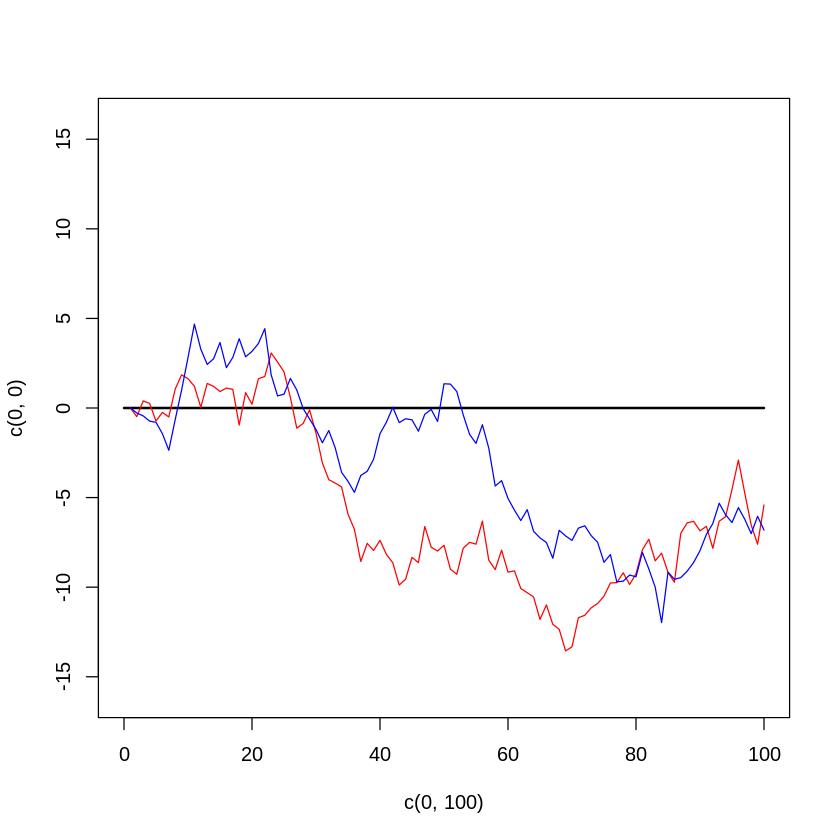

In [42]:
# initial graph
plot(c(0,100),c(0,0),type="l",lwd=2,ylim=c(-16,16))
lines(ts(x), col = "red")
lines(ts(y),col = "blue")

# Example-11-6

In [2]:
# Libraries for dynamic lm and "stargazer" regression table 
library(dynlm);library(stargazer)
data(fertil3, package='wooldridge')

# Define Yearly time series beginning in 1913
tsdata <- ts(fertil3, start=1913)

# Linear regression of model with first differences:
res1 <- dynlm( d(gfr) ~ d(pe), data=tsdata)

# Linear regression of model with lagged differences:
res2 <- dynlm( d(gfr) ~ d(pe) + L(d(pe)) + L(d(pe),2), data=tsdata)

# Pretty regression table
stargazer(res1,res2,type="text")


                              Dependent variable:           
                    ----------------------------------------
                                     d(gfr)                 
                           (1)                  (2)         
------------------------------------------------------------
d(pe)                     -0.043              -0.036        
                         (0.028)              (0.027)       
                                                            
L(d(pe))                                      -0.014        
                                              (0.028)       
                                                            
L(d(pe), 2)                                  0.110***       
                                              (0.027)       
                                                            
Constant                  -0.785             -0.964**       
                         (0.502)              (0.468)       
                       

In [15]:
cor(fertil3$gfr, fertil3$gfr_1, use = "pairwise.complete.obs")

[1] 0.9764517

In [16]:
cor(fertil3$pe, fertil3$pe_1, use = "pairwise.complete.obs")

[1] 0.96358

In [20]:
?fertil3



    gfr: births per 1000 women 15-44

    pe: real value pers. exemption, $

    year: 1913 to 1984

    t: time trend, t=1,...,72

    tsq: t^2

    pe_1: pe[_n-1]

    pe_2: pe[_n-2]

    pe_3: pe[_n-3]

    pe_4: pe[_n-4]

    pill: =1 if year >= 1963

    ww2: =1, 1941 to 1945

    tcu: t^3

    cgfr: change in gfr: gfr - gfr_1

    cpe: pe - pe_1m

    cpe_1: cpe[_n-1]

    cpe_2: cpe[_n-2]

    cpe_3: cpe[_n-3]

    cpe_4: cpe[_n-4]

    gfr_1: gfr[_n-1]

    cgfr_1: cgfr[_n-1]

    cgfr_2: cgfr[_n-2]

    cgfr_3: cgfr[_n-3]

    cgfr_4: cgfr[_n-4]

    gfr_2: gfr[_n-2]


In [14]:
lm.11.16.1  <- lm(cgfr ~ cpe, data = fertil3)
summary(lm.11.16.1)


Call:
lm(formula = cgfr ~ cpe, data = fertil3)

Residuals:
   Min     1Q Median     3Q    Max 
-7.980 -2.552 -0.377  1.866 14.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.78478    0.50204  -1.563    0.123
cpe         -0.04268    0.02837  -1.504    0.137

Residual standard error: 4.221 on 69 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.03176,	Adjusted R-squared:  0.01773 
F-statistic: 2.263 on 1 and 69 DF,  p-value: 0.137


In [17]:
lm.11.16.2  <-  lm(cgfr ~ cpe + cpe_1 + cpe_2, data = fertil3)
summary(lm.11.16.2)


Call:
lm(formula = cgfr ~ cpe + cpe_1 + cpe_2, data = fertil3)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8307 -2.1842 -0.1912  1.8442 11.4506 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.96368    0.46776  -2.060  0.04339 *  
cpe         -0.03620    0.02677  -1.352  0.18101    
cpe_1       -0.01397    0.02755  -0.507  0.61385    
cpe_2        0.10999    0.02688   4.092  0.00012 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.859 on 65 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.2325,	Adjusted R-squared:  0.1971 
F-statistic: 6.563 on 3 and 65 DF,  p-value: 0.0006054


Joint significance of pe and pe_1

In [18]:
lm.11.16.2res  <-  lm(cgfr ~ cpe_2, data = fertil3)
summary(lm.11.16.2res)


Call:
lm(formula = cgfr ~ cpe_2, data = fertil3)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6545 -1.8542 -0.0991  1.9755 13.0087 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.02322    0.46823  -2.185 0.032369 *  
cpe_2        0.10782    0.02618   4.119 0.000107 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.876 on 67 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.202,	Adjusted R-squared:  0.1901 
F-statistic: 16.96 on 1 and 67 DF,  p-value: 0.0001069


In [27]:
anova(lm.11.16.2res,lm.11.16.2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
67,1006.613,NA,NA,NA,NA
65,968.200,2,38.41264,1.289414,0.2823824


In [26]:
linearHypothesis(lm.11.16.2 , c("cpe" , "cpe_1"))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
67,1006.613,NA,NA,NA,NA
65,968.200,2,38.41264,1.289414,0.2823824


# Example 11.7: Wages and Productivity
$$\widehat{log(hrwage_t)} = \beta_0 + \beta_1log(outphr_t) + \beta_2t + \mu_t$$ Data from the Economic Report of the President, 1989, Table B-47. The data are for the non-farm business sector.

In [9]:
data("earns")

wage_time <- lm(lhrwage ~ loutphr + t, data = earns)
wage_diff <- lm(diff(lhrwage) ~ diff(loutphr), data = earns)
stargazer(type = "text",wage_time, wage_diff,  single.row = TRUE, header = FALSE, digits=5)


                                             Dependent variable:                
                              --------------------------------------------------
                                       lhrwage               diff(lhrwage)      
                                         (1)                      (2)           
--------------------------------------------------------------------------------
loutphr                         1.63964*** (0.09335)                            
t                               -0.01823*** (0.00175)                           
diff(loutphr)                                             0.80932*** (0.17345)  
Constant                        -5.32845*** (0.37445)      -0.00366 (0.00422)   
--------------------------------------------------------------------------------
Observations                             41                        40           
R2                                     0.97122                  0.36424         
Adjusted R2                

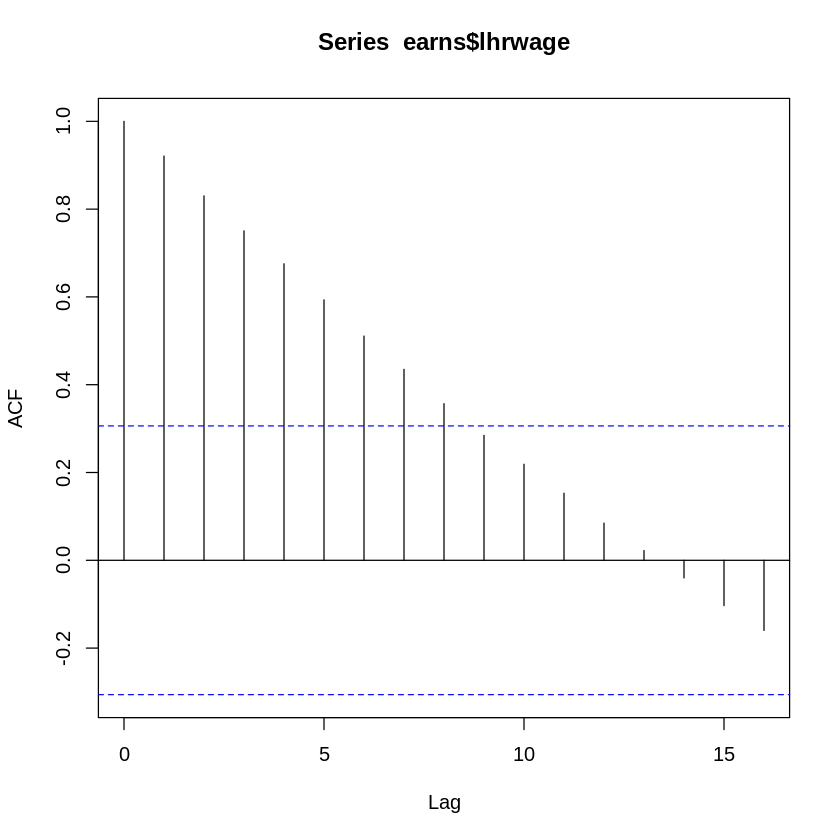

In [10]:
acf(earns$lhrwage)

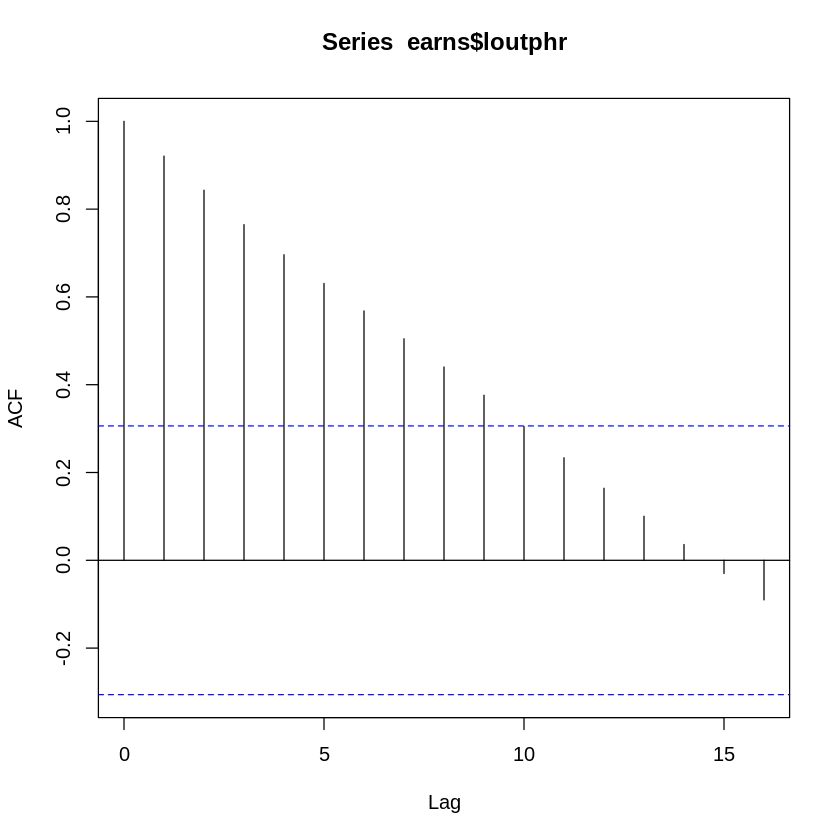

In [11]:
acf(earns$loutphr)

In [12]:
wage_time <- lm(lhrwage ~ loutphr + t, data = earns)
wage_diff <- dynlm(d(lhrwage) ~ d(loutphr), data = earns)
stargazer(type = "text",wage_time, wage_diff,  single.row = TRUE, header = FALSE, digits=5)


                                             Dependent variable:                
                              --------------------------------------------------
                                       lhrwage                 d(lhrwage)       
                                         OLS                    dynamic         
                                                                 linear         
                                         (1)                      (2)           
--------------------------------------------------------------------------------
loutphr                         1.63964*** (0.09335)                            
t                               -0.01823*** (0.00175)                           
d(loutphr)                                                0.80932*** (0.17345)  
Constant                        -5.32845*** (0.37445)      -0.00366 (0.00422)   
--------------------------------------------------------------------------------
Observations               

In [7]:
data("earns")

lm.11.17.1  <-  lm(lhrwage ~ loutphr + t, data = earns)
summary(lm.11.17.1)


Call:
lm(formula = lhrwage ~ loutphr + t, data = earns)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059230 -0.026151  0.002411  0.020322  0.051966 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.328454   0.374449  -14.23  < 2e-16 ***
loutphr      1.639639   0.093347   17.57  < 2e-16 ***
t           -0.018230   0.001748  -10.43 1.05e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02854 on 38 degrees of freedom
Multiple R-squared:  0.9712,	Adjusted R-squared:  0.9697 
F-statistic: 641.2 on 2 and 38 DF,  p-value: < 2.2e-16


Detrend the variables

In [8]:
dtr.lhrwage  <-  lm(lhrwage ~ t, data = earns)$resid
dtr.loutphr  <-  lm(loutphr ~ t, data = earns)$resid
summary(lm(dtr.lhrwage ~ -1 + dtr.loutphr))


Call:
lm(formula = dtr.lhrwage ~ -1 + dtr.loutphr)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059230 -0.026151  0.002411  0.020322  0.051966 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
dtr.loutphr  1.63964    0.09098   18.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02782 on 40 degrees of freedom
Multiple R-squared:  0.8903,	Adjusted R-squared:  0.8876 
F-statistic: 324.8 on 1 and 40 DF,  p-value: < 2.2e-16


In [9]:
cor(dtr.lhrwage, c(dtr.lhrwage[-1],NA), use = "pairwise.complete.obs")

[1] 0.9671587

In [10]:
cor(dtr.loutphr, c(dtr.loutphr[-1],NA), use = "pairwise.complete.obs")

[1] 0.9452925

After detrending, those variables are still high correlated to their lags. 

Highly autocorrelation, serial correlation.

The diff function calculates the difference between elements of a vector. By default, it assumes that the first difference between subsequent observations should be calculated.

Difference 

In [11]:
lm.11.17.2 <- lm(I(diff(lhrwage)) ~ I(diff(loutphr)), data = earns)
summary(lm.11.17.2)


Call:
lm(formula = I(diff(lhrwage)) ~ I(diff(loutphr)), data = earns)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040921 -0.010165 -0.000383  0.007969  0.040329 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.003662   0.004220  -0.868    0.391    
I(diff(loutphr))  0.809316   0.173454   4.666 3.75e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01695 on 38 degrees of freedom
Multiple R-squared:  0.3642,	Adjusted R-squared:  0.3475 
F-statistic: 21.77 on 1 and 38 DF,  p-value: 3.748e-05


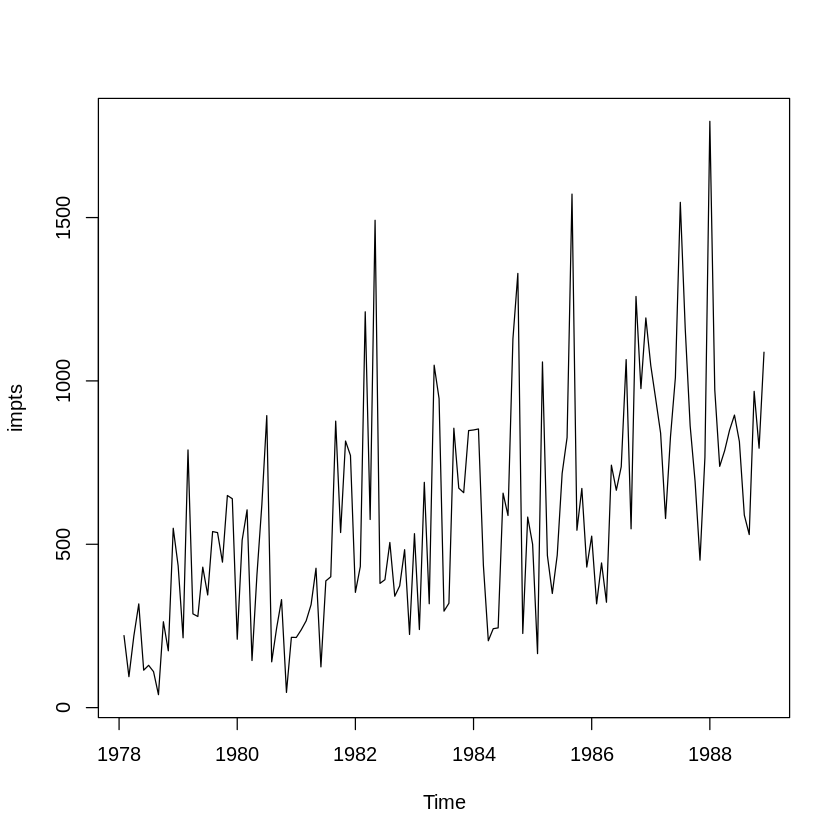

In [4]:
data(barium, package='wooldridge')

# Imports from China: Variable "chnimp" from data frame "data"
# Monthly time series starting Feb. 1978
impts <- ts(barium$chnimp, start=c(1978,2), frequency=12)

# plot time series
plot(impts)

# Example 11.8


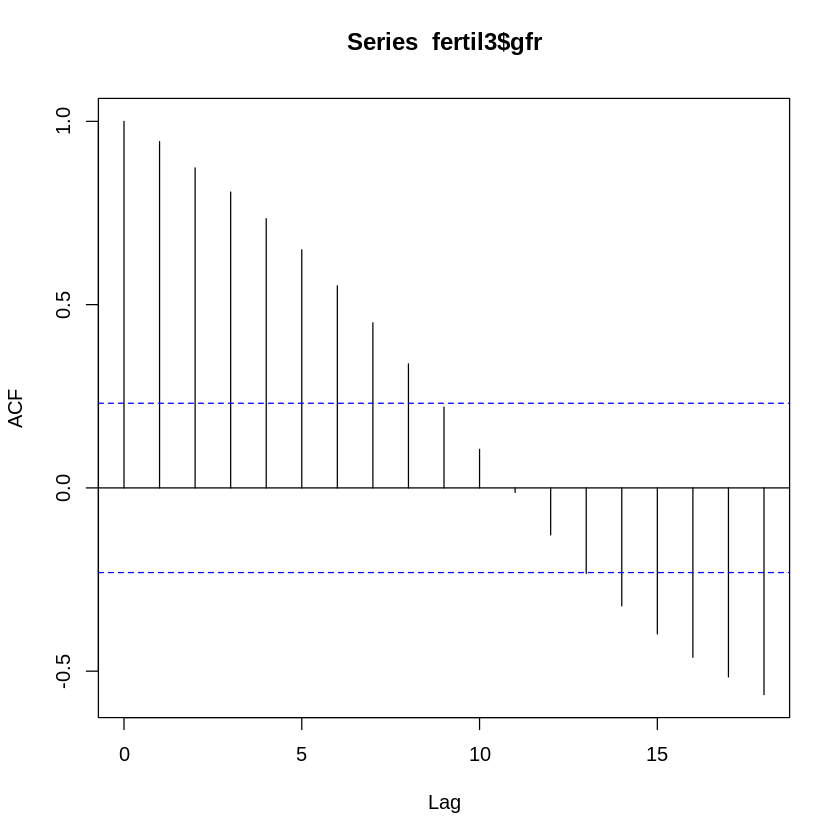

In [3]:
acf(fertil3$gfr)

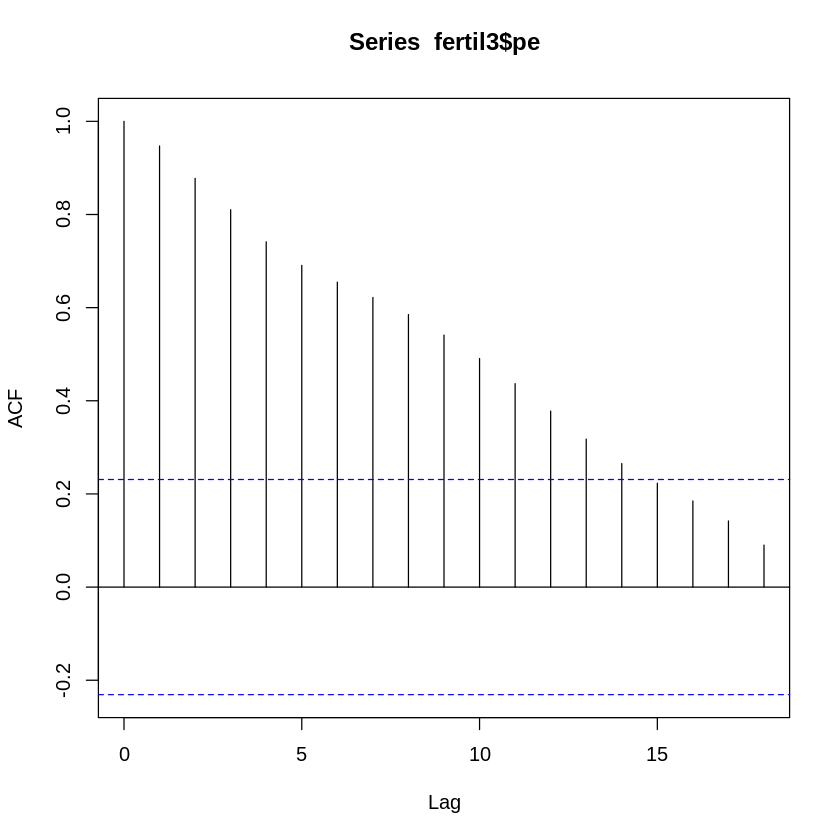

In [4]:
acf(fertil3$pe)

In [4]:
data("fertil3")
lm.11.18  <-  lm(cgfr ~ cpe + cpe_1 + cpe_2 + cgfr_1, data = fertil3)
summary(lm.11.18)

Warning message in data("fertil3"):
“data set ‘fertil3’ not found”


Call:
lm(formula = cgfr ~ cpe + cpe_1 + cpe_2 + cgfr_1, data = fertil3)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7491 -2.2345  0.0776  1.7393  9.2857 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.702159   0.453799  -1.547 0.126724    
cpe         -0.045472   0.025642  -1.773 0.080926 .  
cpe_1        0.002064   0.026778   0.077 0.938800    
cpe_2        0.105135   0.025590   4.108 0.000115 ***
cgfr_1       0.300242   0.105903   2.835 0.006125 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.666 on 64 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.3181,	Adjusted R-squared:  0.2755 
F-statistic: 7.464 on 4 and 64 DF,  p-value: 5.336e-05


A significant coefficient on cgfr_1 suggests serial correlations in the errors if we exclude the lag cgfr in the equaiton.


In [1]:
# Libraries for dynamic lm and "stargazer" regression table 
library(dynlm);library(stargazer)
data(fertil3, package='wooldridge')

# Define Yearly time series beginning in 1913
tsdata <- ts(fertil3, start=1913)

# Linear regression of model with first differences:
res1 <- dynlm( d(gfr) ~ d(pe), data=tsdata)

# Linear regression of model with lagged differences:
res2 <- dynlm( d(gfr) ~ d(pe) + L(d(pe)) + L(d(pe),2), data=tsdata)

# Pretty regression table
stargazer(res1,res2,type="text")

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




                              Dependent variable:           
                    ----------------------------------------
                                     d(gfr)                 
                           (1)                  (2)         
------------------------------------------------------------
d(pe)                     -0.043              -0.036        
                         (0.028)              (0.027)       
                                                            
L(d(pe))                                      -0.014        
                                              (0.028)       
                                                            
L(d(pe), 2)                                  0.110***       
                                              (0.027)       
                                                            
Constant                  -0.785             -0.964**       
                         (0.502)              (0.468)       
                       


#    Example-EffMkts.

Loading required package: xts

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "F"

           F.Open F.High F.Low F.Close F.Volume F.Adjusted
2007-01-03   7.56   7.67  7.44    7.51 78652200   5.247986
2007-01-04   7.56   7.72  7.43    7.70 63454900   5.380758
2007-01-05   7.72   7.75  7.57    7.62 40562100   5.324853
2007-01-08   7.63   7.75  7.62    7.73 48938500   5.401723
2007-01-09   7.75   7.86  7.73    7.79 56732200   5.443650
2007-01-10   7.79   7.79  7.67    7.73 42397100   5.401723

           F.Open F.High F.Low F.Close F.Volume F.Adjusted
2019-06-25   9.97   9.99  9.83    9.84 28682000       9.84
2019-06-26   9.87   9.96  9.82    9.91 33739100       9.91
2019-06-27  10.04  10.24 10.00   10.20 42954600      10.20
2019-06-28  10.20  10.31 10.20   10.23 37551600      10.23
2019-07-01  10.34  10.43 10.07   10.15 38452600      10.15
2019-07-02  10.15  10.21 10.04   10.12 29708000      10.12

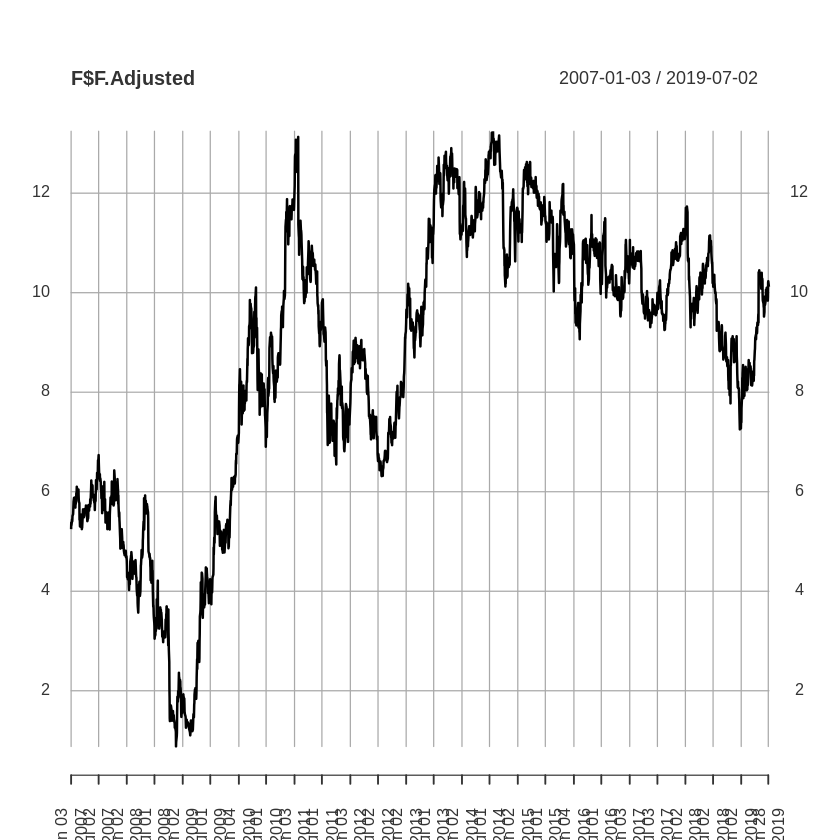

In [5]:
library(quantmod)
# Which Yahoo Finance symbols? 
# See http://finance.yahoo.com/lookup:
# "F" = Ford Motor Company

# Download data
getSymbols("F", auto.assign=TRUE)

# first and last 6 rows of resulting data frame:
head(F)
tail(F)

# Time series plot of adjusted closing prices:
plot(F$F.Adjusted, las=2)

[1] 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
[16] 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
[31] 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
[46] 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



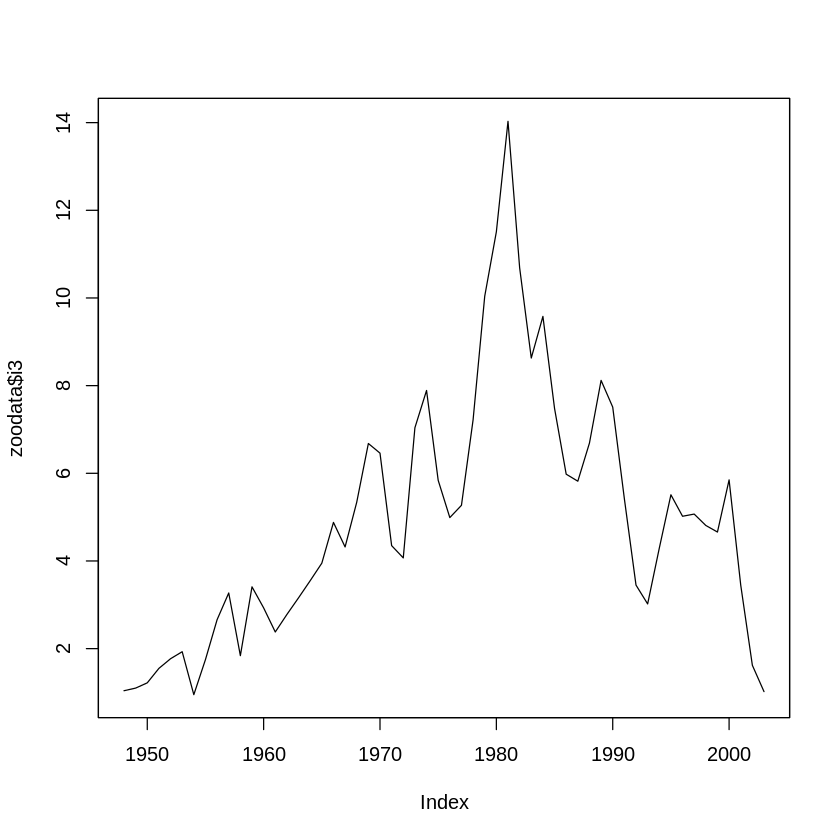

In [3]:
data(intdef, package='wooldridge')

# Variable "year" as the time measure:
intdef$year

# define "zoo" object containing all data, time measure=year:
library(zoo)
zoodata <- zoo(intdef, order.by=intdef$year)

# Time series plot of inflation
plot(zoodata$i3)

In [9]:
library(dynlm);library(stargazer)
data(nyse, package='wooldridge')

# Define time series (numbered 1,...,n)
tsdata <- ts(nyse)

# Linear regression of models with lags:
reg1 <- dynlm(return~L(return)                        , data=tsdata) 
reg2 <- dynlm(return~L(return)+L(return,2)            , data=tsdata) 
reg3 <- dynlm(return~L(return)+L(return,2)+L(return,3), data=tsdata) 

# Pretty regression table
stargazer(reg1, reg2, reg3, type="text",
                            keep.stat=c("n","rsq","adj.rsq","f"))


                                 Dependent variable:                    
             -----------------------------------------------------------
                                       return                           
                     (1)                 (2)                 (3)        
------------------------------------------------------------------------
L(return)           0.059               0.060               0.061       
                   (0.038)             (0.038)             (0.038)      
                                                                        
L(return, 2)                           -0.038              -0.040       
                                       (0.038)             (0.038)      
                                                                        
L(return, 3)                                                0.031       
                                                           (0.038)      
                                                  




    Example-EffMkts.R



[1] "AAPL"


                                  Dependent variable:                      
             --------------------------------------------------------------
                                          ret                              
                     (1)                  (2)                  (3)         
---------------------------------------------------------------------------
L(ret)              -0.003               -0.004               -0.003       
                   (0.021)              (0.021)              (0.021)       
                                                                           
L(ret, 2)                                -0.029               -0.030       
                                        (0.021)              (0.021)       
                                                                           
L(ret, 3)                                                     0.005        
                                                             (0.021)       
           

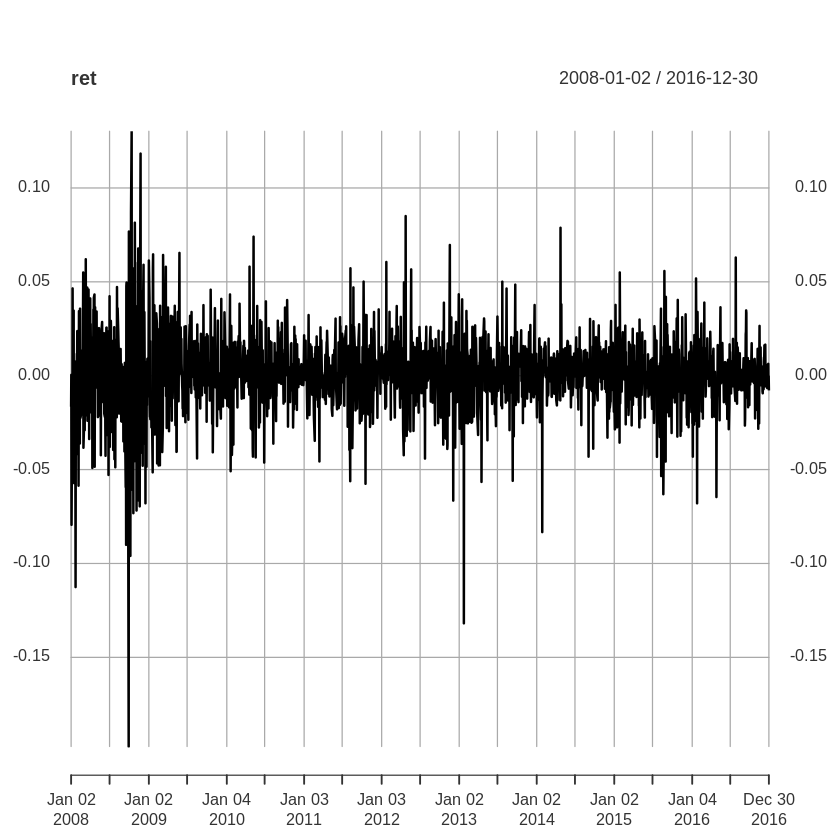

In [10]:
library(zoo);library(quantmod);library(dynlm);library(stargazer)

# Download data using the quantmod package:
getSymbols("AAPL", auto.assign = TRUE)

# Calculate return as the log difference
ret <- diff( log(AAPL$AAPL.Adjusted) )
# Subset 2008-2016 by special xts indexing:
ret <- ret["2008/2016"]

# Plot returns
plot(ret)

# Linear regression of models with lags:
ret <- as.zoo(ret)  # dynlm cannot handle xts objects
reg1 <- dynlm(ret~L(ret) ) 
reg2 <- dynlm(ret~L(ret)+L(ret,2) ) 
reg3 <- dynlm(ret~L(ret)+L(ret,2)+L(ret,3) ) 

# Pretty regression table
stargazer(reg1, reg2, reg3, type="text",
                            keep.stat=c("n","rsq","adj.rsq","f"))

# #     Simulate-RandomWalk.R


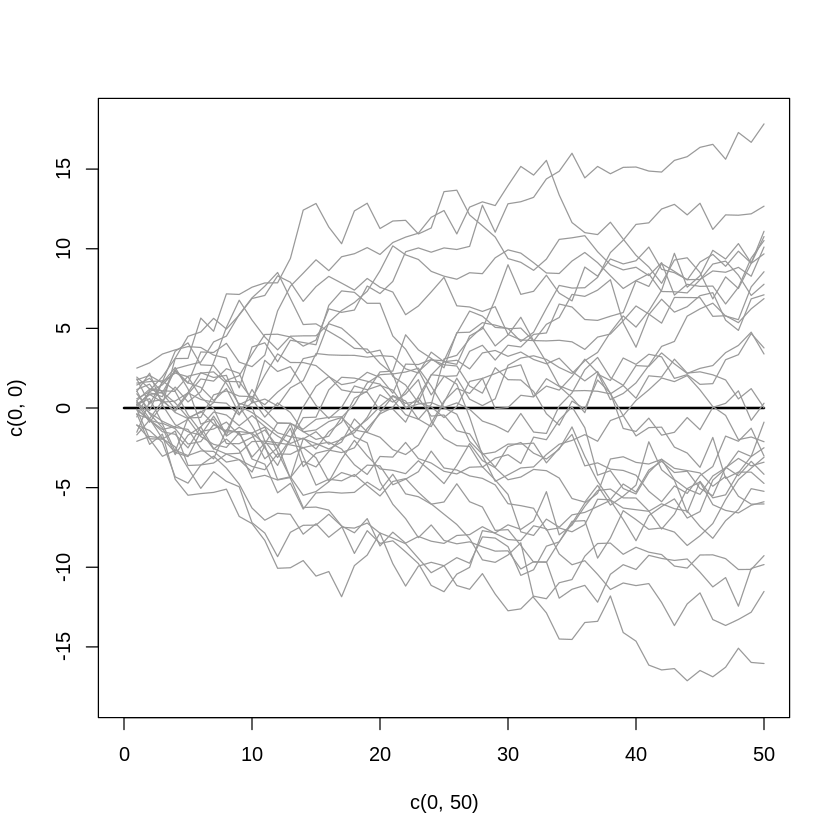

In [3]:
# Initialize Random Number Generator
set.seed(348546)
# initial graph
plot(c(0,50),c(0,0),type="l",lwd=2,ylim=c(-18,18))

# loop over draws:
for(r in 1:30) {
  # i.i.d. standard normal shock
  e <- rnorm(50)
  # Random walk as cumulative sum of shocks
  y <- ts(cumsum(e))
  # Add line to graph
  lines(y, col=gray(.6))
}

# Forecast for riders in Trail data

https://rdrr.io/cran/mosaicData/man/Riders.html


Description

The Pioneer Valley Planning Commission (PVPC) collected data north of Chestnut Street in Florence, MA for ninety days from April 5, 2005 to November 15, 2005. Data collectors set up a laser sensor, with breaks in the laser beam recording when a rail-trail user passed the data collection station.
Usage

1

	

data(Riders)



https://rdrr.io/cran/mosaicData/man/RailTrail.html


Description

The Pioneer Valley Planning Commission (PVPC) collected data north of Chestnut Street in Florence, MA for ninety days from April 5, 2005 to November 15, 2005. Data collectors set up a laser sensor, with breaks in the laser beam recording when a rail-trail user passed the data collection station. 


data(RailTrail)

A data frame with 90 observations on the following variables.

    hightemp daily high temperature (in degrees Fahrenheit)

    lowtemp daily low temperature (in degrees Fahrenheit)

    avgtemp average of daily low and daily high temperature (in degrees Fahrenheit)

    spring indicator of whether the season was Spring

    summer indicator of whether the season was Summer

    fall indicator of whether the season was Fall

    cloudcover measure of cloud cover (in oktas)

    precip measure of precipitation (in inches)

    volume estimated number of trail users that day (number of breaks recorded)

    weekday logical indicator of whether the day was a non-holiday weekday

    dayType one of "weekday" or "weekend"


In [3]:
library(mosaicData)
data(RailTrail)

# Fit a linear model
ride_lm <- lm(volume ~hightemp, data = RailTrail)

# View the summary of your model
summary(ride_lm)

# Print the tidy model output
tidy(ride_lm)


Call:
lm(formula = volume ~ hightemp, data = RailTrail)

Residuals:
     Min       1Q   Median       3Q      Max 
-254.562  -57.800    8.737   57.352  314.035 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.079     59.395  -0.288    0.774    
hightemp       5.702      0.848   6.724 1.71e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 104.2 on 88 degrees of freedom
Multiple R-squared:  0.3394,	Adjusted R-squared:  0.3319 
F-statistic: 45.21 on 1 and 88 DF,  p-value: 1.705e-09


term,estimate,std.error,statistic,p.value
(Intercept),-17.079281,59.3953040,-0.2875527,7.743652e-01
hightemp,5.701878,0.8480074,6.7238541,1.705138e-09


In [6]:
install.packages("prophet")
library(prophet)

df   # A data frame with columns ds & y (datetimes & metrics)

# Create a prophet object
m <- prophet(df) 

# Extend dataframe 100 days into the future
future <- make_future_dataframe(m, periods = 100)

# Generate forecast for next 100 days
forecast <- predict(m, future)


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
also installing the dependencies ‘matrixStats’, ‘checkmate’, ‘desc’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘loo’, ‘pkgbuild’, ‘dygraphs’, ‘extraDistr’, ‘rstan’

Loading required package: Rcpp
Loading required package: rlang

Attaching package: ‘rlang’

The following objects are masked from ‘package:purrr’:

    %@%, %||%, as_function, flatten, flatten_chr, flatten_dbl,
    flatten_int, flatten_lgl, invoke, list_along, modify, prepend,
    rep_along, splice



function (x, df1, df2, ncp, log = FALSE) 
{
    if (missing(ncp)) 
        .Call(C_df, x, df1, df2, log)
    else .Call(C_dnf, x, df1, df2, ncp, log)
}
<bytecode: 0x55b6b8cc2670>
<environment: namespace:stats>

ERROR: Error in as.environment(where): invalid object for 'as.environment'


In [ ]:
Chapter 11 - Further Issues in Using OLS with Time Series Data

    Example 11.1: Static Model

Dataset is not available

    Example 11.2: Finite Distributed Lag Model

Dataset is not available

    Example 11.3: AR[1] Model

Dataset is not available

    Example 11.4: Efficient Market Hypothesis

use http://fmwww.bc.edu/ec-p/data/wooldridge/nyse

summ return

    Variable |     Obs        Mean   Std. Dev.       Min        Max
-------------+-----------------------------------------------------
      return |     690    .1957843   2.114532  -15.32173   8.448762

reg return return_1

      Source |       SS       df       MS              Number of obs =     689
-------------+------------------------------           F(  1,   687) =    2.40
       Model |  10.6866237     1  10.6866237           Prob > F      =  0.1218
    Residual |  3059.73813   687   4.4537673           R-squared     =  0.0035
-------------+------------------------------           Adj R-squared =  0.0020
       Total |  3070.42476   688  4.46282668           Root MSE      =  2.1104

------------------------------------------------------------------------------
      return |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    return_1 |   .0588984   .0380231     1.55   0.122    -.0157569    .1335538
       _cons |    .179634   .0807419     2.22   0.026     .0211034    .3381646
------------------------------------------------------------------------------

    Example 11.5: Expectation Augmented Phillips Curve

use http://fmwww.bc.edu/ec-p/data/wooldridge/phillips

reg cinf unem

      Source |       SS       df       MS              Number of obs =      48
-------------+------------------------------           F(  1,    46) =    5.56
       Model |  33.3829988     1  33.3829988           Prob > F      =  0.0227
    Residual |   276.30513    46  6.00663326           R-squared     =  0.1078
-------------+------------------------------           Adj R-squared =  0.0884
       Total |  309.688129    47  6.58910913           Root MSE      =  2.4508

------------------------------------------------------------------------------
        cinf |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        unem |  -.5425869   .2301559    -2.36   0.023    -1.005867    -.079307
       _cons |   3.030581    1.37681     2.20   0.033     .2592061    5.801955
------------------------------------------------------------------------------

    Natural rate of unemployment

display _b[_cons]/-_b[unem]
5.5854288

    Example 11.6: Fertility Equation

use http://fmwww.bc.edu/ec-p/data/wooldridge/fertil3

reg gfr gfr_1

      Source |       SS       df       MS              Number of obs =      71
-------------+------------------------------           F(  1,    69) = 1413.53
       Model |   25734.824     1   25734.824           Prob > F      =  0.0000
    Residual |  1256.21904    69  18.2060731           R-squared     =  0.9535
-------------+------------------------------           Adj R-squared =  0.9528
       Total |   26991.043    70  385.586329           Root MSE      =  4.2669

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       gfr_1 |   .9777202   .0260053    37.60   0.000      .925841    1.029599
       _cons |   1.304937   2.548821     0.51   0.610    -3.779822    6.389695
------------------------------------------------------------------------------

reg pe pe_1
	  
      Source |       SS       df       MS              Number of obs =      71
-------------+------------------------------           F(  1,    69) =  895.85
       Model |   276585.96     1   276585.96           Prob > F      =  0.0000
    Residual |  21303.1151    69  308.740798           R-squared     =  0.9285
-------------+------------------------------           Adj R-squared =  0.9274
       Total |  297889.075    70  4255.55822           Root MSE      =  17.571

------------------------------------------------------------------------------
          pe |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        pe_1 |   .9478853   .0316692    29.93   0.000     .8847069    1.011064
       _cons |   6.426196   3.808601     1.69   0.096    -1.171754    14.02415
------------------------------------------------------------------------------

reg cgfr cpe

      Source |       SS       df       MS              Number of obs =      71
-------------+------------------------------           F(  1,    69) =    2.26
       Model |  40.3237245     1  40.3237245           Prob > F      =  0.1370
    Residual |  1229.25863    69  17.8153424           R-squared     =  0.0318
-------------+------------------------------           Adj R-squared =  0.0177
       Total |  1269.58235    70  18.1368908           Root MSE      =  4.2208

------------------------------------------------------------------------------
        cgfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         cpe |  -.0426776   .0283672    -1.50   0.137    -.0992686    .0139134
       _cons |  -.7847796   .5020398    -1.56   0.123    -1.786322    .2167625
------------------------------------------------------------------------------

reg cgfr cpe cpe_1 cpe_2

      Source |       SS       df       MS              Number of obs =      69
-------------+------------------------------           F(  3,    65) =    6.56
       Model |  293.259833     3  97.7532778           Prob > F      =  0.0006
    Residual |   968.19996    65   14.895384           R-squared     =  0.2325
-------------+------------------------------           Adj R-squared =  0.1971
       Total |  1261.45979    68  18.5508793           Root MSE      =  3.8595

------------------------------------------------------------------------------
        cgfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         cpe |  -.0362021   .0267737    -1.35   0.181     -.089673    .0172687
       cpe_1 |  -.0139706    .027554    -0.51   0.614    -.0689997    .0410584
       cpe_2 |   .1099896   .0268797     4.09   0.000     .0563071    .1636721
       _cons |  -.9636787   .4677599    -2.06   0.043     -1.89786   -.0294976
------------------------------------------------------------------------------

    Example 11.7: Wages and Productivity

use http://fmwww.bc.edu/ec-p/data/wooldridge/earns

reg lhrwage loutphr t

      Source |       SS       df       MS              Number of obs =      41
-------------+------------------------------           F(  2,    38) =  641.23
       Model |  1.04458054     2  .522290269           Prob > F      =  0.0000
    Residual |  .030951697    38  .000814518           R-squared     =  0.9712
-------------+------------------------------           Adj R-squared =  0.9697
       Total |  1.07553224    40  .026888306           Root MSE      =  .02854

------------------------------------------------------------------------------
     lhrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     loutphr |   1.639637    .093347    17.56   0.000     1.450666    1.828608
           t |  -.0182299   .0017482   -10.43   0.000     -.021769   -.0146909
       _cons |  -5.328446   .3744486   -14.23   0.000    -6.086478   -4.570415
------------------------------------------------------------------------------

reg ghrwage goutphr
	  
      Source |       SS       df       MS              Number of obs =      40
-------------+------------------------------           F(  1,    38) =   21.77
       Model |  .006255013     1  .006255013           Prob > F      =  0.0000
    Residual |  .010917977    38  .000287315           R-squared     =  0.3642
-------------+------------------------------           Adj R-squared =  0.3475
       Total |  .017172989    39  .000440333           Root MSE      =  .01695

------------------------------------------------------------------------------
     ghrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     goutphr |   .8093157   .1734535     4.67   0.000     .4581774    1.160454
       _cons |  -.0036621     .00422    -0.87   0.391    -.0122051    .0048808
------------------------------------------------------------------------------

    Example 11.8: Fertility Equation

use http://fmwww.bc.edu/ec-p/data/wooldridge/fertil3

reg cgfr cpe cpe_1 cpe_2 cgfr_1

      Source |       SS       df       MS              Number of obs =      69
-------------+------------------------------           F(  4,    64) =    7.46
       Model |  401.286124     4  100.321531           Prob > F      =  0.0001
    Residual |   860.17367    64  13.4402136           R-squared     =  0.3181
-------------+------------------------------           Adj R-squared =  0.2755
       Total |  1261.45979    68  18.5508793           Root MSE      =  3.6661

------------------------------------------------------------------------------
        cgfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         cpe |  -.0454721   .0256417    -1.77   0.081    -.0966972     .005753
       cpe_1 |    .002064   .0267776     0.08   0.939    -.0514303    .0555584
       cpe_2 |   .1051346   .0255904     4.11   0.000      .054012    .1562572
      cgfr_1 |   .3002422   .1059034     2.84   0.006     .0886757    .5118086
       _cons |  -.7021595   .4537988    -1.55   0.127    -1.608727    .2044079
------------------------------------------------------------------------------

This page prepared by Oleksandr Talavera (revised 8 Nov 2002) 


Glossary 	
Chapter 11 	
Asymptotically Uncorrelated 	A time series process in which the correlation between random variables at two points in time tends to zero as the time interval between them increases. (See also weakly dependent.)


Autoregressive Process of Order One [AR(1)] 	A time series model whose current value depends linearly on its most recent value plus an unpredictable disturbance.


Contemporaneously Exogenous 	In time series or panel data applications, a regressor is contemporaneously exogenous if it is uncorrelated with the error term in the same time period, although it may be correlated with the errors in other time periods.


Contemporaneously Homoskedastic 	In time series or panel data applications, the variance of the error term, conditional on the regressors in the same time period, is constant.


Covariance Stationary 	A time series process with constant mean and variance where the covariance between any two random variables in the sequence depends only on the distance between them.


Difference-Stationary Process 	A time series sequence that is I(0) in its first differences.


Dynamically Complete Model 	A time series model where no further lags of either the dependent variable or the explanatory variables help to explain the mean of the dependent variable.


First Difference 	A transformation on a time series constructed by taking the difference of adjacent time periods, where the earlier time period is subtracted from the later time period.


First Order Autocorrelation 	For a time series process ordered chronologically, the correlation coefficient between pairs of adjacent observations.


Highly Persistent 	A time series process where outcomes in the distant future are highly correlated with current outcomes.
Integrated of Order One [I(1)] 	A time series process that needs to be first-differenced in order to produce an I(0) process.


Integrated of Order Zero [I(0)] 	A stationary, weakly dependent time series process that, when used in regression analysis, satisfies the law of large numbers and the central limit theorem.


Moving Average Process of Order One [MA(1)] 	A time series process generated as a linear function of the current value and one lagged value of a zero-mean, constant variance, uncorrelated stochastic process.


Nonstationary Process 	A time series process whose joint distributions are not constant across different epochs.


Random Walk 	A time series process where next period's value is obtained as this period's value, plus an independent (or at least an uncorrelated) error term.


Random Walk with Drift 	A random walk that has a constant (or drift) added in each period.


Sequentially Exogenous 	A feature of an explanatory variable in time series (or panel data) models where the error term in the current time period has a zero mean conditional on all current and past explanatory variables; a weaker version is stated in terms of zero correlations.



Serially Uncorrelated 	The errors in a time series or panel data model are pairwise uncorrelated across time.


Stable AR(1) Process 	An AR(1) process where the parameter on the lag is less than one in absolute value. The correlation between two random variables in the sequence declines to zero at a geometric rate as the distance between the random variables increases, and so a stable AR(1) process is weakly dependent.


Stationary Process 	A time series process where the marginal and all joint distributions are invariant across time.
Strongly Dependent 	See highly persistent.


Trend-Stationary Process 	A process that is stationary once a time trend has been removed; it is usually implicit that the detrended series is weakly dependent.


Unit Root Process 	A highly persistent time series process where the current value equals last period's value, plus a weakly dependent disturbance.


Weakly Dependent 	A term that describes a time series process where some measure of dependence between random variables at two points in time?such as correlation?diminishes as the interval between the two points in time increases.
	
